In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import run_supervised_models as rsm

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
basedir = "G:\\My Drive\\CS230Project\\trained_models"
figdir = "G:\\My Drive\\CS230Project\\milestone2_figs"

In [3]:
# load baseine sequence model

model = torch.load(os.path.join(basedir, "baseline_model.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model

bm.model= model





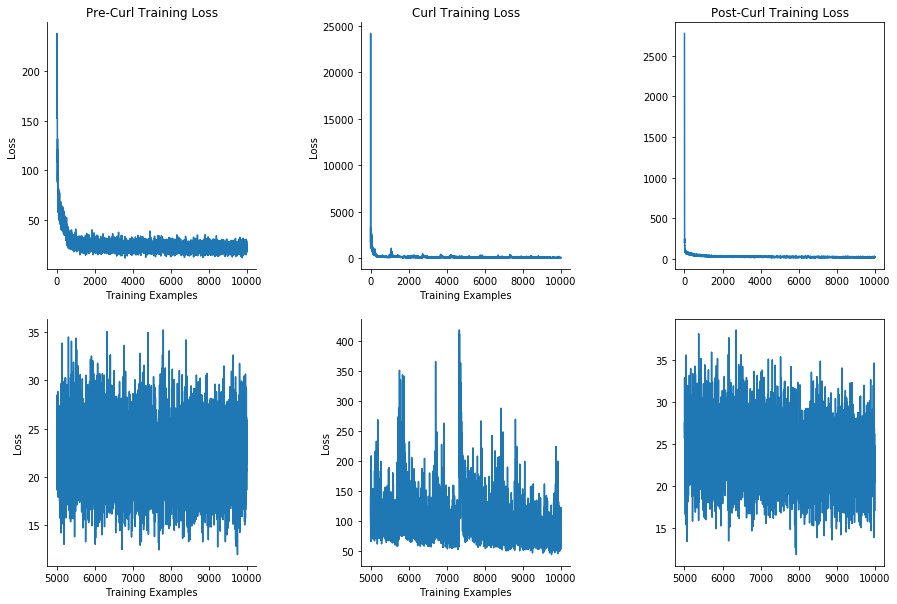

In [4]:
# plot training loss
losses = np.load(os.path.join(basedir,"baseline_losses.npy"))
f,ax = plt.subplots(2,3,figsize=[15,10])
f.subplots_adjust(wspace=.5)
pre_curl_losses, curl_losses, post_curl_losses = losses[:int(1E4)],losses[int(1E4):int(2E4)],losses[int(2E4):int(3E4)]


ax[0,0].plot(pre_curl_losses)
ax[0,0].set_title("Pre-Curl Training Loss")
ax[1,0].plot(np.arange(1E4-5000,1E4),pre_curl_losses[-5000:])



ax[0,1].plot(curl_losses)
ax[0,1].set_title("Curl Training Loss")
ax[1,1].plot(np.arange(1E4-5000,1E4),curl_losses[-5000:])

ax[0,2].plot(post_curl_losses)
ax[0,2].set_title("Post-Curl Training Loss")
ax[1,2].plot(np.arange(1E4-5000,1E4),post_curl_losses[-5000:])

for i in [0,1]:
    for j in [0,1]:
        ax[i,j].set_xlabel("Training Examples")
        ax[i,j].set_ylabel("Loss")
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
f.savefig(os.path.join(figdir,"baseline_training_losses.pdf"),format="pdf")
f.savefig(os.path.join(figdir,"baseline_training_losses.png"),format="png")



torch.Size([50, 3, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100])


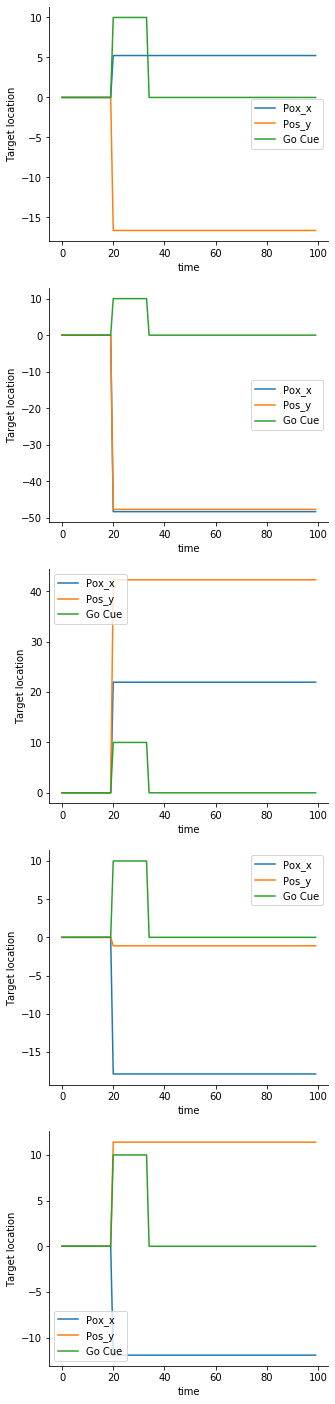

In [5]:
# plot example inputs
X,Y,YHAT,CURL = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape)

f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(X[j,:,:].T)
    ax[j].set_ylabel("Target location")
    ax[j].set_xlabel("time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].legend(('Pox_x','Pos_y','Go Cue'))
f.savefig(os.path.join(figdir,"Baseline Inputs.pdf"),format="pdf")
f.savefig(os.path.join(figdir,"Baseline Inputs.png"),format="png")





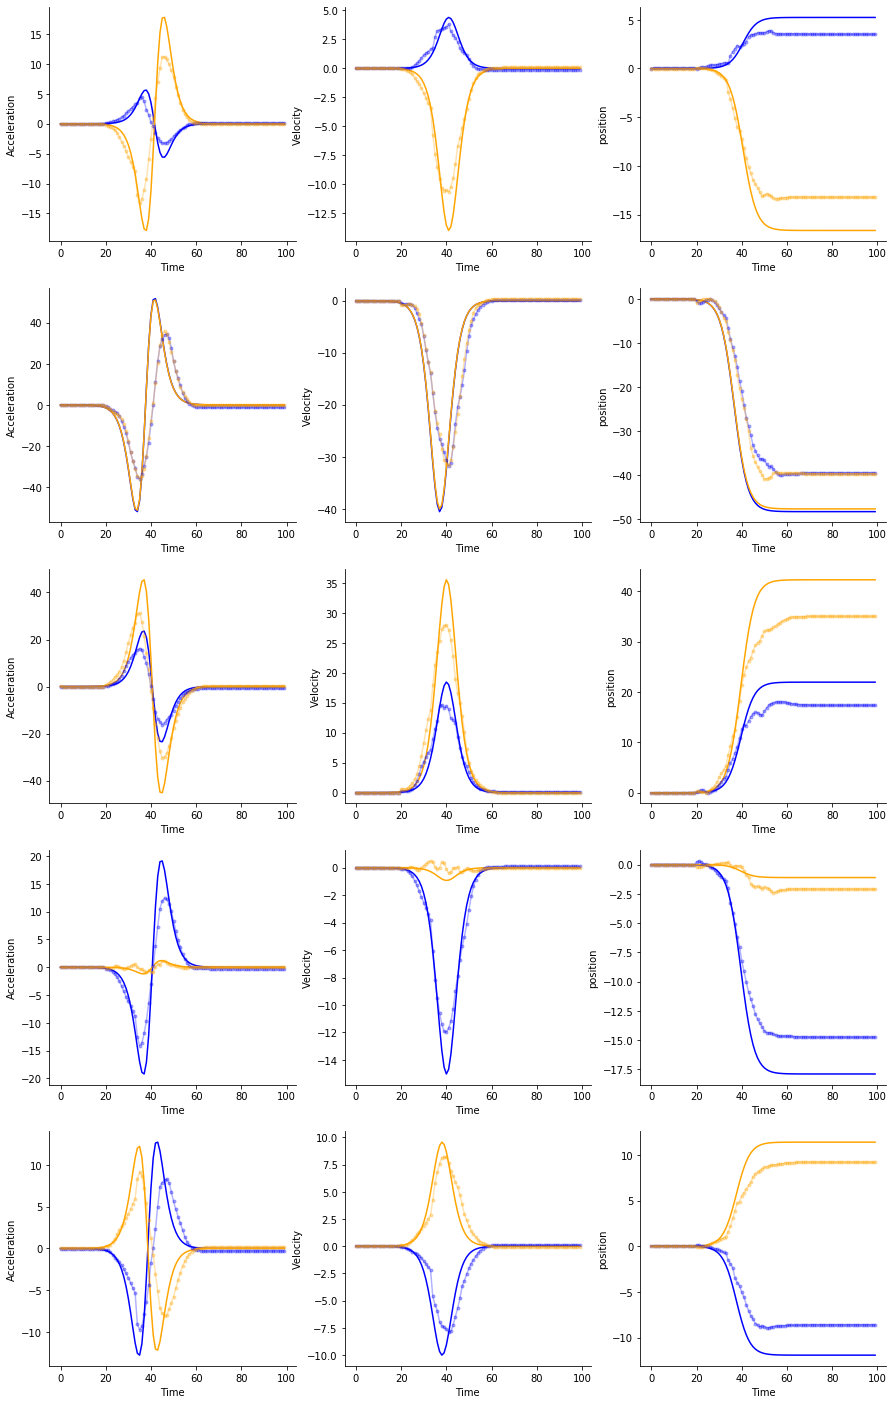

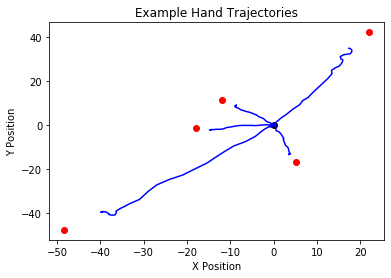

In [6]:
# plot example output kinematics 
f,ax = plt.subplots(5,3,figsize=[15,25])
for j in range(5):
    ax[j,0].plot(Y[j,0,:].T,color='blue')
    ax[j,0].plot(Y[j,1,:].T,color='orange')
    ax[j,0].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j,0].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j,0].set_ylabel("Acceleration")
    
    ax[j,1].plot(Y[j,2,:].T,color='blue')
    ax[j,1].plot(Y[j,3,:].T,color='orange')
    ax[j,1].plot(YHAT[j,2,:].T,color='blue',marker='.',alpha=.3)
    ax[j,1].plot(YHAT[j,3,:].T,color='orange',marker='.',alpha=.3)
    ax[j,1].set_ylabel("Velocity")
    
    ax[j,2].plot(Y[j,4,:].T,color='blue')
    ax[j,2].plot(Y[j,5,:].T,color='orange')
    ax[j,2].plot(YHAT[j,4,:].T,color='blue',marker='.',alpha=.3)
    ax[j,2].plot(YHAT[j,5,:].T,color='orange',marker='.',alpha=.3)
    ax[j,2].set_ylabel("position")
    
    for k in range(3):
        ax[j,k].set_xlabel("Time")
        ax[j,k].spines['top'].set_visible(False)
        ax[j,k].spines['right'].set_visible(False)
        
    
f.savefig(os.path.join(figdir,"baseline_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"baseline_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_example_trajectories.png"),format='png')


In [7]:
# baseline with curl field
model = torch.load(os.path.join(basedir, "baseline_with_curl.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model

bm.model= model
bm.data_gen.curl=True

torch.Size([50, 3, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100])


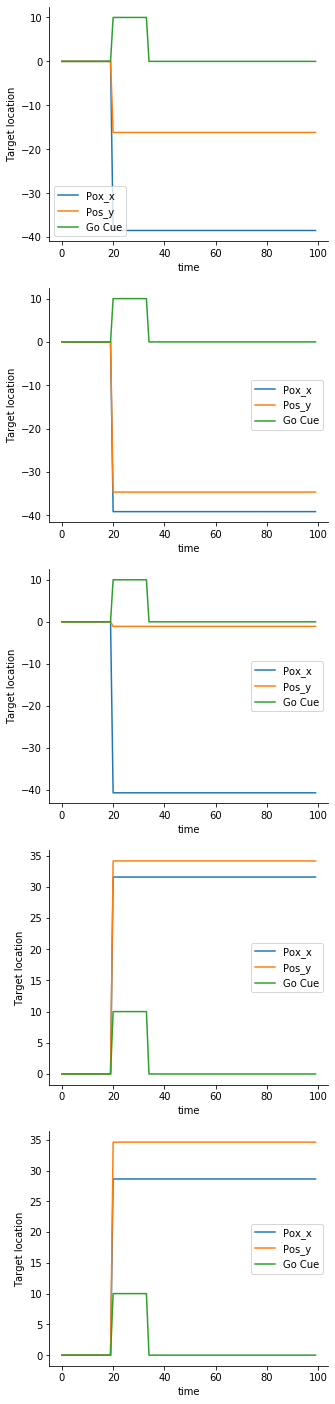

In [8]:
# plot example inputs
X,Y,YHAT,CURL = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape)

f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(X[j,:,:].T)
    ax[j].set_ylabel("Target location")
    ax[j].set_xlabel("time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    ax[j].legend(('Pox_x','Pos_y','Go Cue'))
f.savefig(os.path.join(figdir,"Baseline_Curl_Inputs.pdf"),format="pdf")
f.savefig(os.path.join(figdir,"Baseline_Curl_Inputs.png"),format="png")

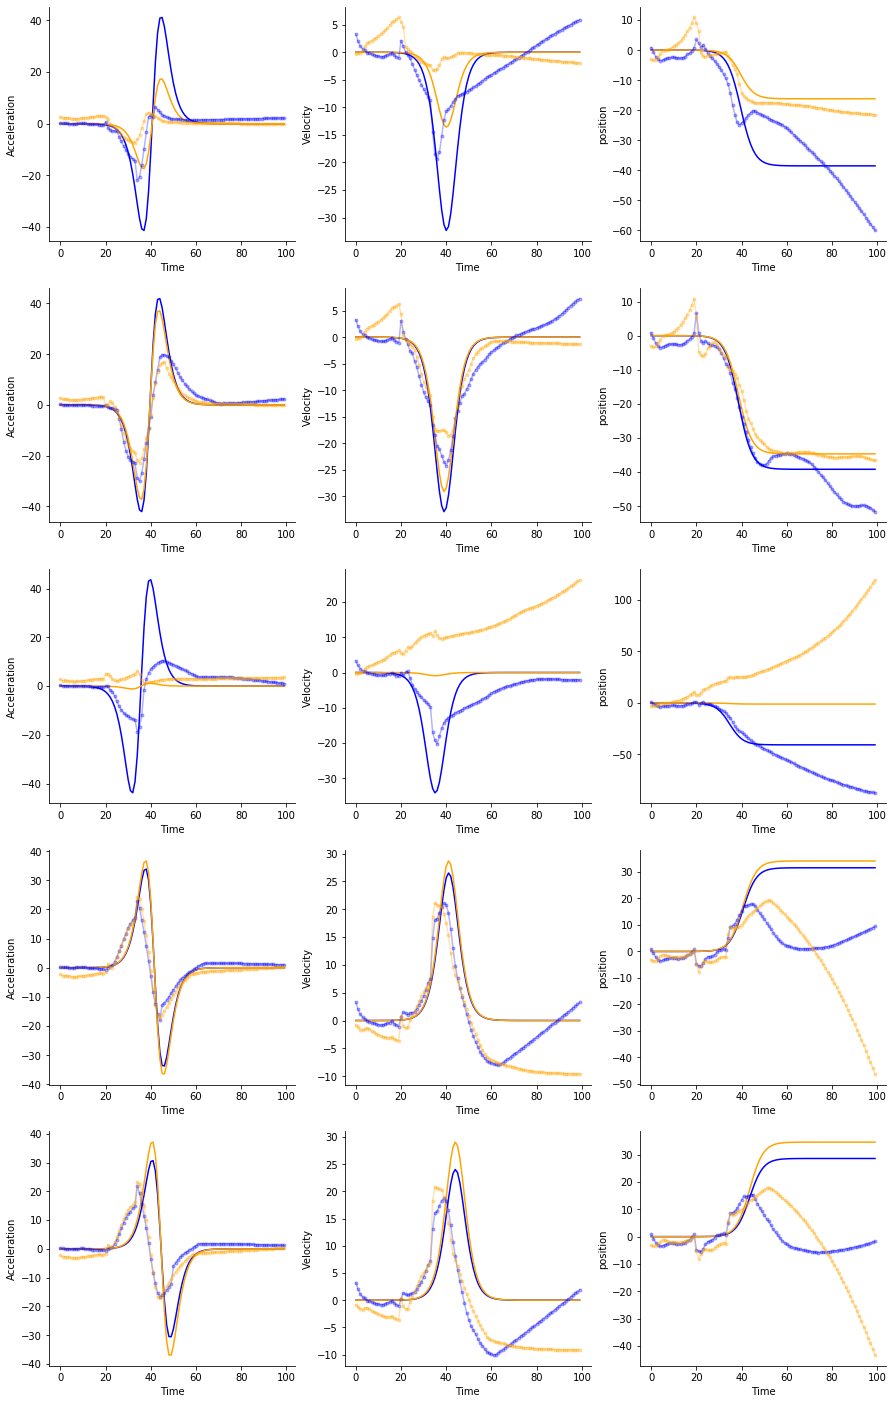

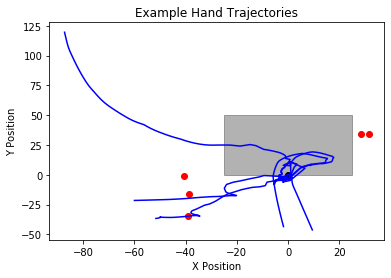

In [9]:
f,ax = plt.subplots(5,3,figsize=[15,25])
for j in range(5):
    ax[j,0].plot(Y[j,0,:].T,color='blue')
    ax[j,0].plot(Y[j,1,:].T,color='orange')
    ax[j,0].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j,0].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j,0].set_ylabel("Acceleration")
    
    ax[j,1].plot(Y[j,2,:].T,color='blue')
    ax[j,1].plot(Y[j,3,:].T,color='orange')
    ax[j,1].plot(YHAT[j,2,:].T,color='blue',marker='.',alpha=.3)
    ax[j,1].plot(YHAT[j,3,:].T,color='orange',marker='.',alpha=.3)
    ax[j,1].set_ylabel("Velocity")
    
    ax[j,2].plot(Y[j,4,:].T,color='blue')
    ax[j,2].plot(Y[j,5,:].T,color='orange')
    ax[j,2].plot(YHAT[j,4,:].T,color='blue',marker='.',alpha=.3)
    ax[j,2].plot(YHAT[j,5,:].T,color='orange',marker='.',alpha=.3)
    ax[j,2].set_ylabel("position")
    
    for k in range(3):
        ax[j,k].set_xlabel("Time")
        ax[j,k].spines['top'].set_visible(False)
        ax[j,k].spines['right'].set_visible(False)
        
    
f.savefig(os.path.join(figdir,"baseline_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"baseline_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_curl_example_trajectories.png"),format='png')


In [10]:
# baseline with curl field
model = torch.load(os.path.join(basedir, "baseline_post_curl.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
bm = rsm.baseline_model()
# set model as the previously fit model
bm.model = model

In [11]:
# plot example inputs
X,Y,YHAT,CURL = bm.test_batch(50)
print(X.shape,Y.shape,YHAT.shape,CURL.shape)

torch.Size([50, 3, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100]) torch.Size([50, 6, 100])


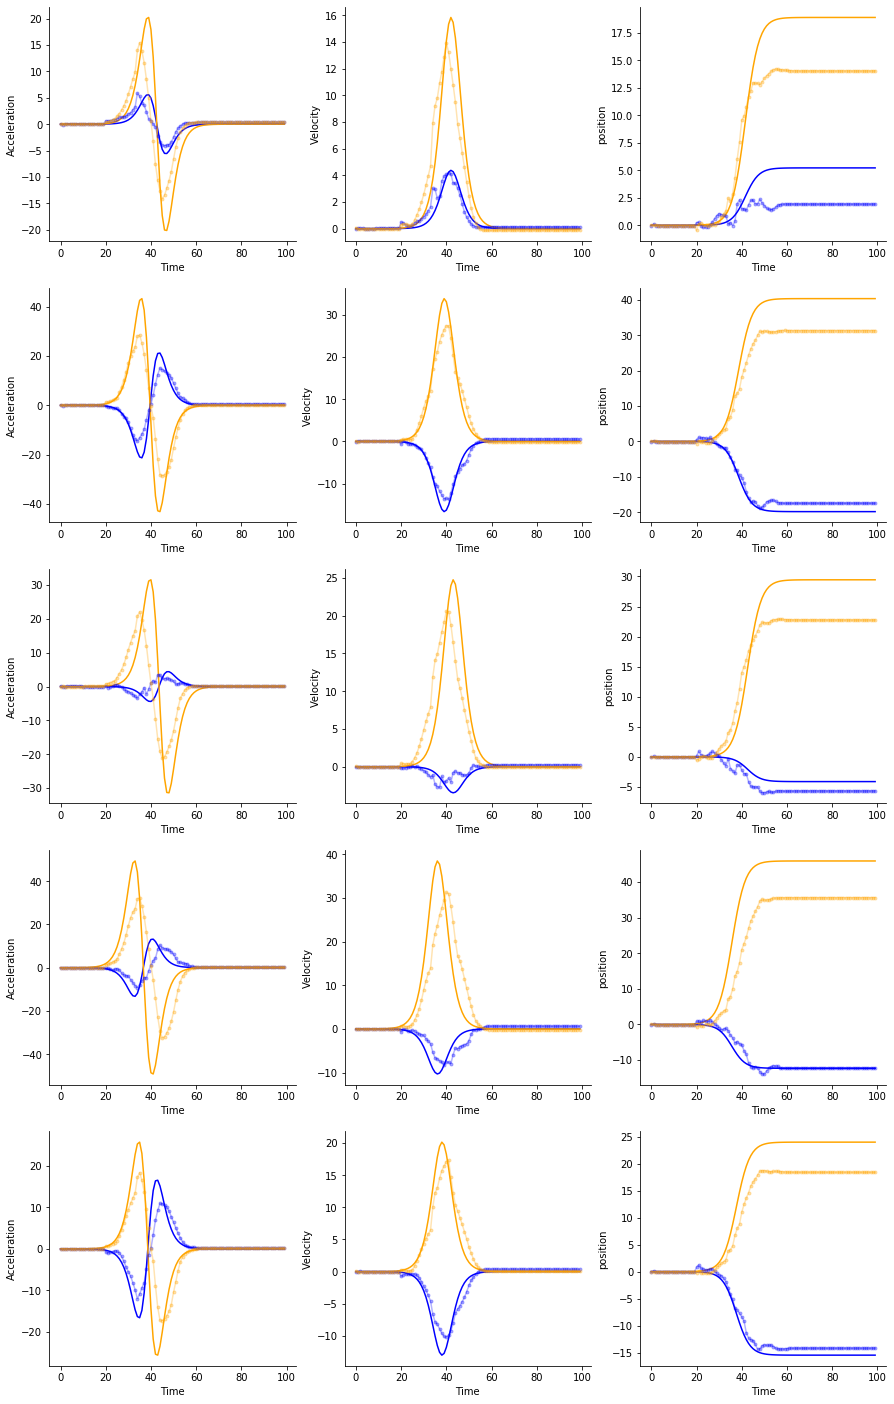

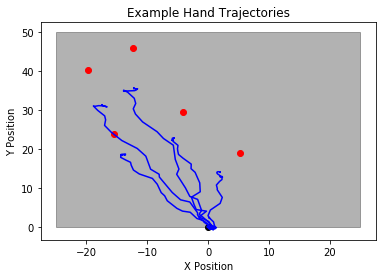

In [12]:
f,ax = plt.subplots(5,3,figsize=[15,25])
for j in range(5):
    ax[j,0].plot(Y[j,0,:].T,color='blue')
    ax[j,0].plot(Y[j,1,:].T,color='orange')
    ax[j,0].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j,0].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j,0].set_ylabel("Acceleration")
    
    ax[j,1].plot(Y[j,2,:].T,color='blue')
    ax[j,1].plot(Y[j,3,:].T,color='orange')
    ax[j,1].plot(YHAT[j,2,:].T,color='blue',marker='.',alpha=.3)
    ax[j,1].plot(YHAT[j,3,:].T,color='orange',marker='.',alpha=.3)
    ax[j,1].set_ylabel("Velocity")
    
    ax[j,2].plot(Y[j,4,:].T,color='blue')
    ax[j,2].plot(Y[j,5,:].T,color='orange')
    ax[j,2].plot(YHAT[j,4,:].T,color='blue',marker='.',alpha=.3)
    ax[j,2].plot(YHAT[j,5,:].T,color='orange',marker='.',alpha=.3)
    ax[j,2].set_ylabel("position")
    
    for k in range(3):
        ax[j,k].set_xlabel("Time")
        ax[j,k].spines['top'].set_visible(False)
        ax[j,k].spines['right'].set_visible(False)
        
    
f.savefig(os.path.join(figdir,"baseline_post_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_post_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red')
ax.plot(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue')
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"baseline_post_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"baseline_post_curl_example_trajectories.png"),format='png')

In [13]:
# baseline with curl field
model = torch.load(os.path.join(basedir, "recursive_pre_curl.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model

In [14]:
# plot example inputs
X,A,AHAT = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,CURL.shape)

torch.Size([50, 3, 100]) torch.Size([50, 2, 100]) torch.Size([50, 2, 100]) torch.Size([50, 6, 100])


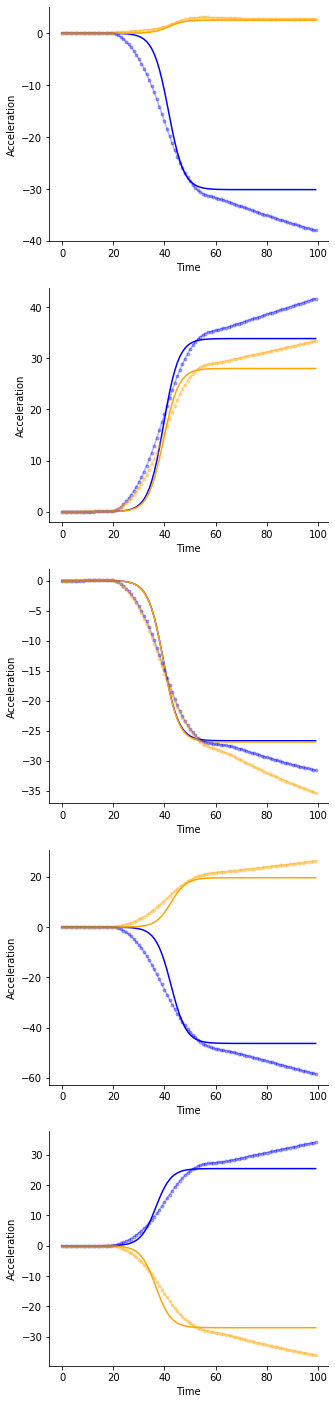

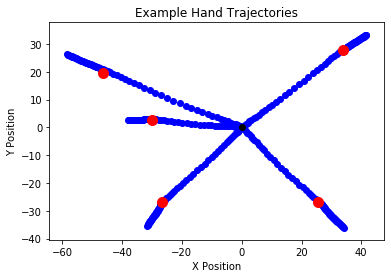

In [15]:
f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    

    
f.savefig(os.path.join(figdir,"recurrent_pre_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_pre_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red',s=100)
ax.scatter(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue',zorder=-1)
# ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"recurrent_pre_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_pre_curl_example_trajectories.png"),format='png')

In [16]:
# baseline with curl field
model = torch.load(os.path.join(basedir, "recursive_curl.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model
rm.data_gen.curl=True

In [17]:
# plot example inputs
X,A,AHAT = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,CURL.shape)

torch.Size([50, 3, 100]) torch.Size([50, 2, 100]) torch.Size([50, 2, 100]) torch.Size([50, 6, 100])


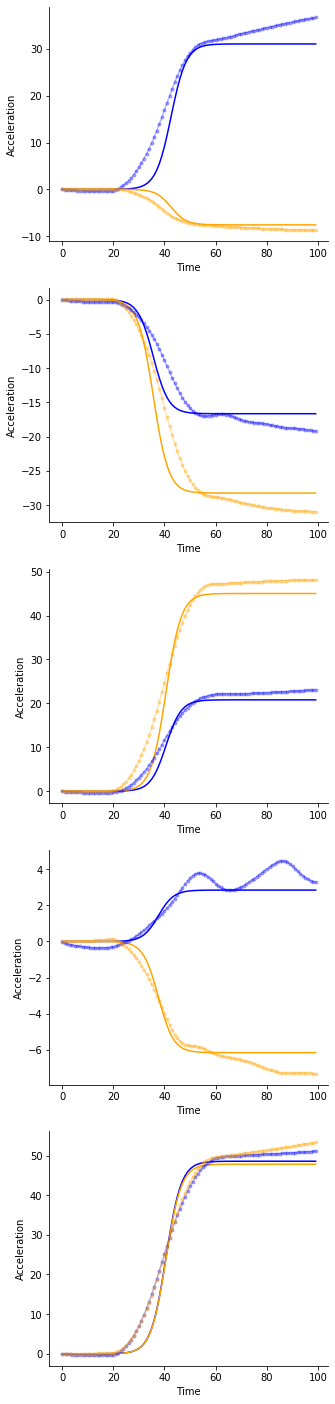

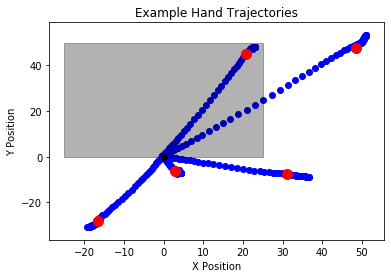

In [18]:
f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    

    
f.savefig(os.path.join(figdir,"recurrent_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red',s=100)
ax.scatter(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue',zorder=-1)
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"recurrent_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_curl_example_trajectories.png"),format='png')

In [19]:
# baseline with curl field
model = torch.load(os.path.join(basedir, "recursive_post_curl.pt"),map_location=torch.device("cpu"))
# instantiate baseline train test class
rm = rsm.recursive_model()
# set model as the previously fit model
rm.model = model
rm.data_gen.curl=False

In [20]:
# plot example inputs
X,A,AHAT = rm.test_batch(50)
Y,YHAT =1/100.*np.cumsum(np.cumsum(A,axis=-1),axis=-1), 1./100.*np.cumsum(np.cumsum(AHAT,axis=-1),axis=-1)

print(X.shape,Y.shape,YHAT.shape,CURL.shape)

torch.Size([50, 3, 100]) torch.Size([50, 2, 100]) torch.Size([50, 2, 100]) torch.Size([50, 6, 100])


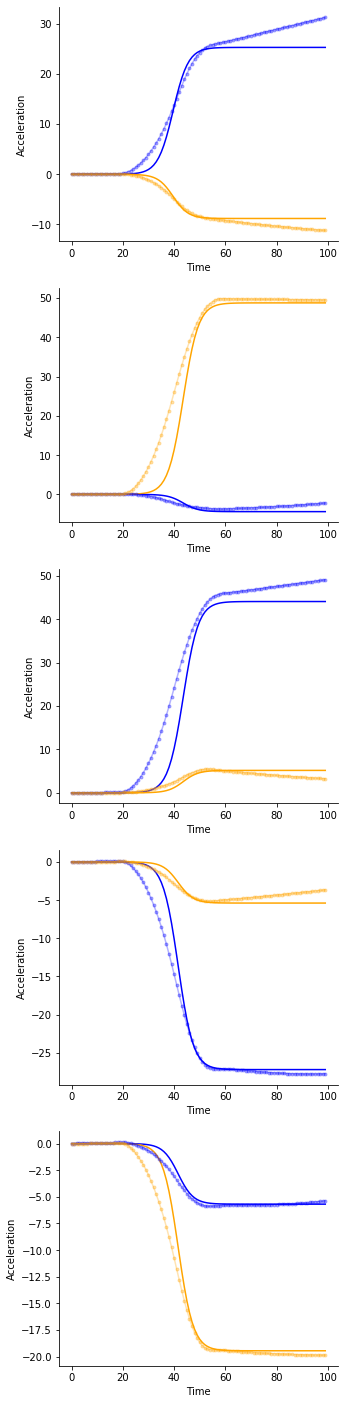

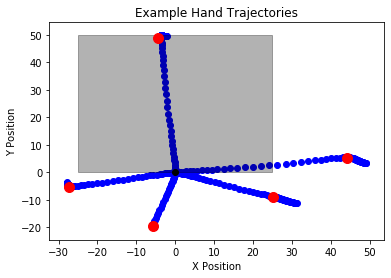

In [21]:
f,ax = plt.subplots(5,1,figsize=[5,25])
for j in range(5):
    ax[j].plot(Y[j,0,:].T,color='blue')
    ax[j].plot(Y[j,1,:].T,color='orange')
    ax[j].plot(YHAT[j,0,:].T,color='blue',marker='.',alpha=.3)
    ax[j].plot(YHAT[j,1,:].T,color='orange',marker='.',alpha=.3)
    ax[j].set_ylabel("Acceleration")
    
    ax[j].set_xlabel("Time")
    ax[j].spines['top'].set_visible(False)
    ax[j].spines['right'].set_visible(False)
    

    
f.savefig(os.path.join(figdir,"recurrent_post_curl_example_outputs.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_post_curl_example_outputs.png"),format='png')

# plot example reaches

f,ax = plt.subplots()
ax.scatter([0],[0],color='black')
ax.scatter(X[:5,0,-1],X[:5,1,-1],color='red',s=100)
ax.scatter(YHAT[:5,-2,:].T,YHAT[:5,-1,:].T,color='blue',zorder=-1)
ax.fill_between([-25,25],[0,0],[50,50],color='black',alpha=.3,zorder=-1)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.set_title("Example Hand Trajectories")

f.savefig(os.path.join(figdir,"recurrent_post_curl_example_trajectories.pdf"),format='pdf')
f.savefig(os.path.join(figdir,"recurrent_post_curl_example_trajectories.png"),format='png')